In [4]:
import math
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from generate_static import K_VALUES, RUNS, calculate_test_w_values, DEFAULT_K, get_dt
from graph_constants import DPI, FONT, COLOR_PALETTE, formatter

N = 100
OUTPUT_DIR = 'amplitude'

In [5]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

w_values = calculate_test_w_values(DEFAULT_K)

runs = range(len(w_values))


# Amplitud de Oscilación vs $\omega$

In [6]:
files = [f'../output/coupled_oscillator_w{i}.csv' for i in runs]
k = DEFAULT_K

amplitude = []
for i, file in enumerate(files):
    df = pd.read_csv(file)

    amplitude.append(df['position'].max())

    print(f"w = {w_values[i]}, a = {amplitude[-1]}")

w = 7.5, a = 0.2544264274973978
w = 7.7631578947368425, a = 0.2847427248688912
w = 8.026315789473685, a = 0.3265222596837668
w = 8.289473684210526, a = 0.3768112308031704
w = 8.552631578947368, a = 0.4537578759594592
w = 8.81578947368421, a = 0.5548906499831575
w = 9.078947368421053, a = 0.7296737909378496
w = 9.342105263157894, a = 1.0557830151102163
w = 9.605263157894736, a = 1.9063548697457529
w = 9.868421052631579, a = 9.589576978875067
w = 10.131578947368421, a = 3.209890039938659
w = 10.394736842105264, a = 1.3807939208307636
w = 10.657894736842106, a = 0.8908078641109036
w = 10.921052631578947, a = 0.6573269484581339
w = 11.18421052631579, a = 0.5226159010321864
w = 11.447368421052632, a = 0.4391830589086772
w = 11.710526315789473, a = 0.3794276753936086
w = 11.973684210526315, a = 0.3386792936665459
w = 12.236842105263158, a = 0.3048905479978666
w = 12.5, a = 0.2684536596097291


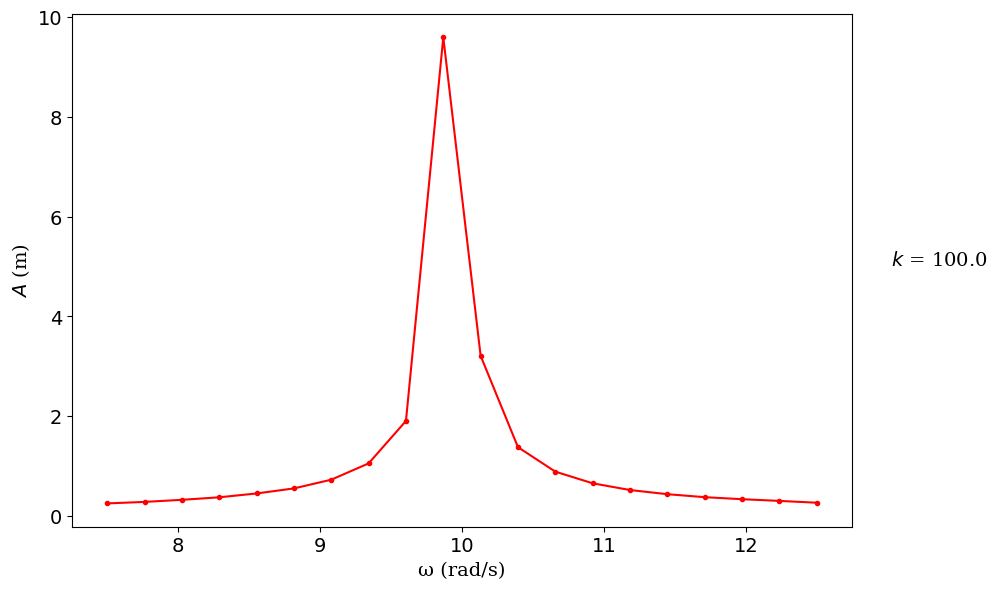

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(w_values, amplitude, '.-', color=COLOR_PALETTE[1])

plt.xlabel('ω (rad/s)', fontdict=FONT)
plt.ylabel('$A$ (m)', fontdict=FONT)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.subplots_adjust(right=0.75)
plt.text(1.05, 0.5,
         f'$k$ = {k}\n'
         , fontdict=FONT, ha='left', va='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()

# Amplitud de Oscilación vs $\omega$ para cada $k$

In [8]:
files = [[f'../output/coupled_oscillator_k{i}_{j}.csv' for j in range(RUNS)] for i in range(len(K_VALUES))]

resonance_w = {}
max_w_idx = {}
amplitudes = []


In [9]:
for i, k in enumerate(K_VALUES):
    w_values = calculate_test_w_values(k)
    amplitudes.append([pd.read_csv(file)['position'].max() for file in files[i]])
    max_w_idx[k] = amplitudes[i].index(max(amplitudes[i]))
    resonance_w[k] = w_values[amplitudes[i].index(max(amplitudes[i]))]
    for w, a in zip(w_values, amplitudes[i]):
        print(f"k = {k}, w = {w}, a = {a}")


k = 100, w = 7.5, a = 0.2544264274973978
k = 100, w = 7.7631578947368425, a = 0.2847427248688912
k = 100, w = 8.026315789473685, a = 0.3265222596837668
k = 100, w = 8.289473684210526, a = 0.3768112308031704
k = 100, w = 8.552631578947368, a = 0.4537578759594592
k = 100, w = 8.81578947368421, a = 0.5548906499831575
k = 100, w = 9.078947368421053, a = 0.7296737909378496
k = 100, w = 9.342105263157894, a = 1.0557830151102163
k = 100, w = 9.605263157894736, a = 1.9063548697457529
k = 100, w = 9.868421052631579, a = 9.589576978875067
k = 100, w = 10.131578947368421, a = 3.209890039938659
k = 100, w = 10.394736842105264, a = 1.3807939208307636
k = 100, w = 10.657894736842106, a = 0.8908078641109036
k = 100, w = 10.921052631578947, a = 0.6573269484581339
k = 100, w = 11.18421052631579, a = 0.5226159010321864
k = 100, w = 11.447368421052632, a = 0.4391830589086772
k = 100, w = 11.710526315789473, a = 0.3794276753936086
k = 100, w = 11.973684210526315, a = 0.3386792936665459
k = 100, w = 12.236

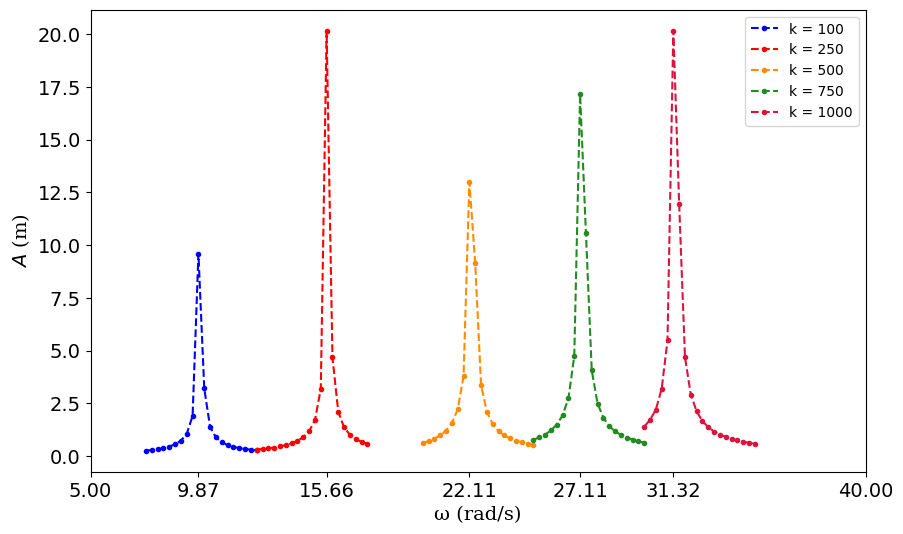

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
for i, k in enumerate(K_VALUES):
    plt.plot(calculate_test_w_values(k), amplitudes[i], '.--', label=f'k = {k}',
             color=COLOR_PALETTE[i % len(COLOR_PALETTE)])

plt.xlabel('ω (rad/s)', fontdict=FONT)
plt.ylabel('$A$ (m)', fontdict=FONT)
# plt.yscale('log')

current_ticks = ax.get_xticks()
ticks = sorted({current_ticks[0], current_ticks[-1]}.union(list(resonance_w.values())))
plt.xticks(ticks, labels=[f'{w:.2f}' for w in ticks], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')

# Frecuencia de Resonancia vs $k$

In [11]:
files = [[f'../output/coupled_oscillator_k{i}_{j}.csv' for j in range(RUNS)] for i in range(len(K_VALUES))]


## Amplitud vs Tiempo


In [12]:
def graph_amplitude_over_time(df, output_file, w, k):
    fig, ax = plt.subplots(figsize=(10, 6))
    frames = int(len(df['time']) / N)
    amplitudes = [df.iloc[i * N:(i + 1) * N, :]['position'].max() for i in range(frames)]

    time = [df.iloc[i * N]['time'] for i in range(frames)]

    plt.plot(time, amplitudes, color=COLOR_PALETTE[0])
    plt.xlabel('Tiempo (s)', fontdict=FONT)
    plt.ylabel('$A$ (m)', fontdict=FONT)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.subplots_adjust(right=0.75)
    plt.text(1.05, 0.5,
             f'$k$ = {k}\n'
             f'$ω$ = {w}\n'
             f'$dt_1$ = {formatter(get_dt(w), None)}\n'
             , fontdict=FONT, ha='left', va='center', transform=ax.transAxes)

    plt.tight_layout()

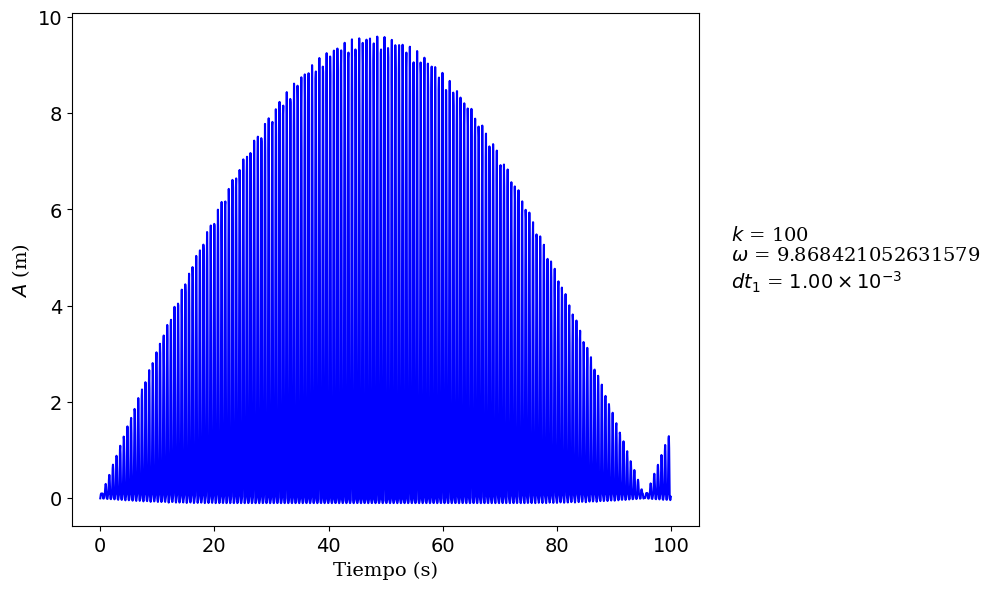

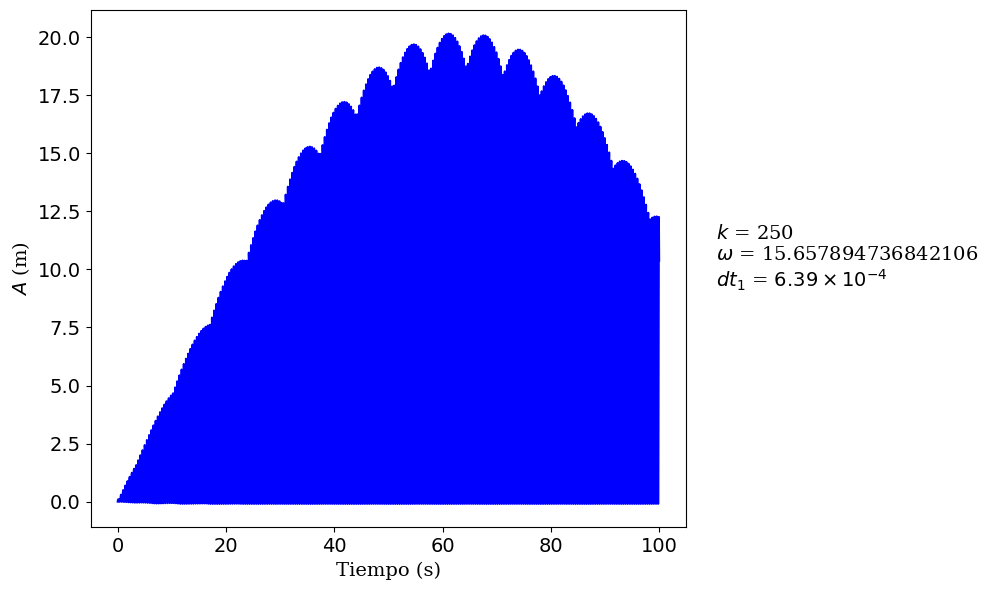

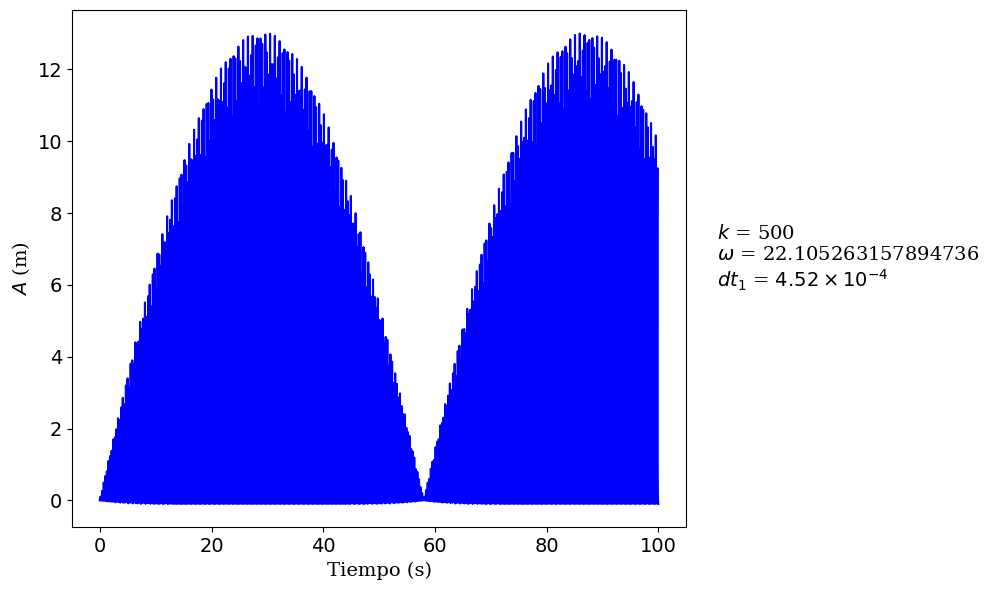

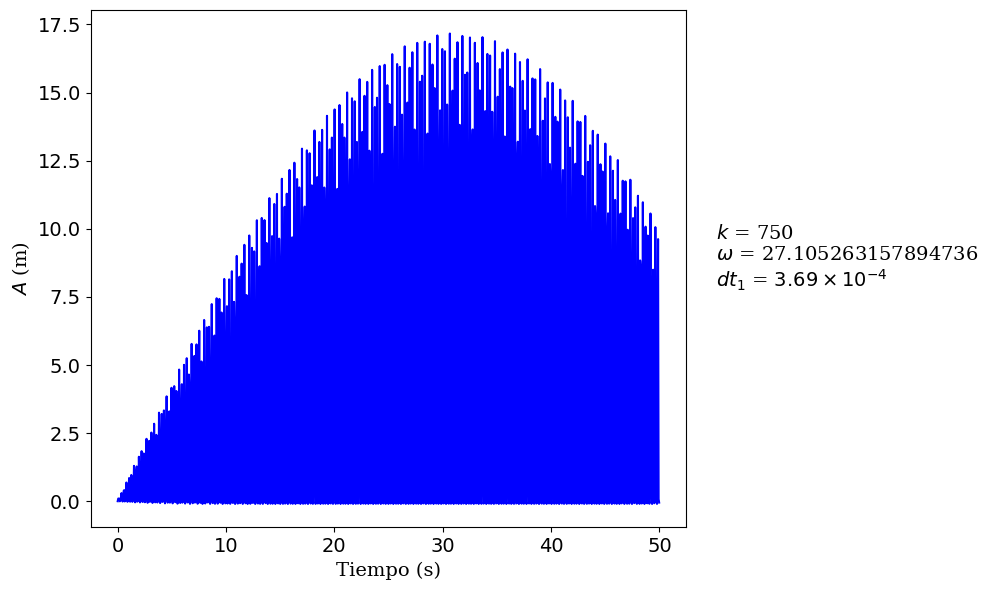

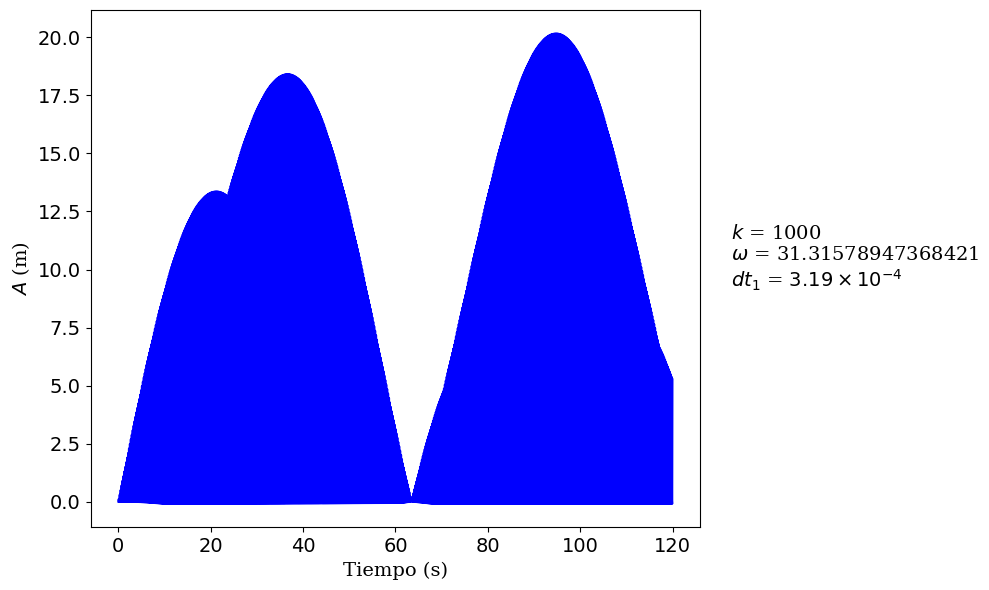

In [13]:
for k_idx in range(len(K_VALUES)):
    k = K_VALUES[k_idx]
    ws = calculate_test_w_values(K_VALUES[k_idx])
    # graph_amplitude_over_time(pd.read_csv(files[k_idx][0]), f'max_amplitude_time_k{k_idx}.png', ws[0], k)
    graph_amplitude_over_time(pd.read_csv(files[k_idx][max_w_idx[k]]), f'max_amplitude_time_k{k_idx}.png', ws[max_w_idx[k]], k)
    # graph_amplitude_over_time(pd.read_csv(files[k_idx][-1]), f'max_amplitude_time_k{k_idx}.png', ws[-1], k)

In [14]:
def compute_square_error(c, x_values, real):
    predicted = [c * math.sqrt(x) for x in x_values]
    squared_errors = [(p - r) ** 2 for p, r in zip(predicted, real)]
    return sum(squared_errors)

Best c: 0.9894789579158316 * x ** 0.5
Error: 0.0019812092416523997


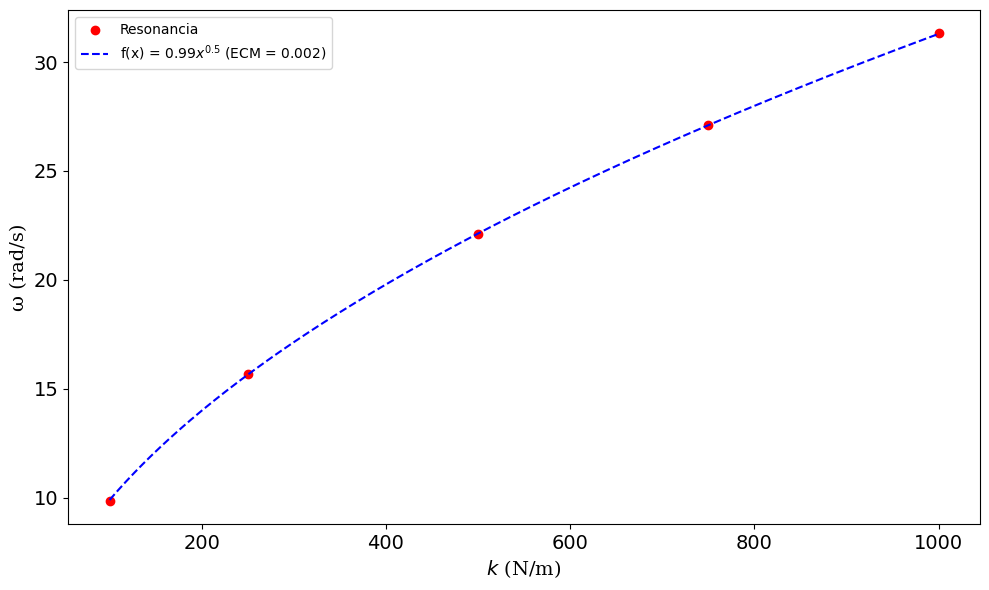

In [15]:
xs = K_VALUES
ys = [resonance_w[k] for k in K_VALUES]

fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel('$k$ (N/m)', fontdict=FONT)
plt.ylabel('ω (rad/s)', fontdict=FONT)

plt.scatter(xs, ys, marker='o', color=COLOR_PALETTE[1], label="Resonancia")

c_values = np.linspace(1.0 - 0.25, 1.0 + 0.25, 500)
errors = [compute_square_error(c, xs, ys) for c in c_values]
min_error_idx = errors.index(min(errors))
c_fit = float(c_values[min_error_idx])

print(f"Best c: {c_fit} * x ** 0.5")
print(f"Error: {compute_square_error(c_fit, xs, ys)}")

xs_line = np.linspace(min(xs), max(xs), 500)

plt.plot(xs_line, [c_fit * math.sqrt(x) for x in xs_line], linestyle='--',
         label=f'f(x) = ${c_fit:.2f} x^{{0.5}}$ (ECM = {errors[min_error_idx]:.3f})',
         color=COLOR_PALETTE[0])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()


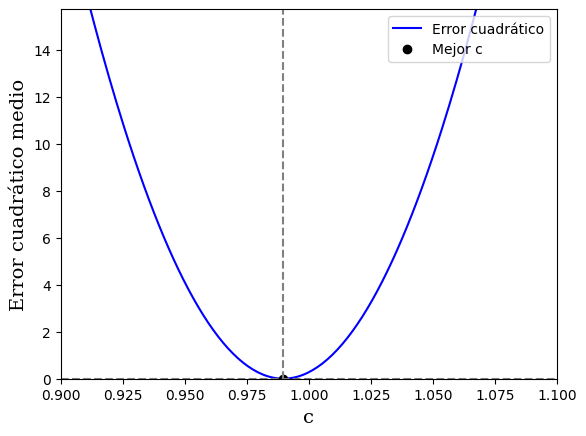

In [16]:
plt.plot(c_values, errors, label="Error cuadrático", color='blue')
plt.plot(c_values[min_error_idx], min(errors), linestyle='', marker='o', color='black', label=f"Mejor c")

plt.axvline(x=c_fit, color='grey', linestyle='--')
plt.axhline(y=min(errors), color='grey', linestyle='--')

xlim_min = 1.0 - 0.1
xlim_max = 1.0 + 0.1
plt.xlim(xlim_min, xlim_max)
plt.ylim(0, max([errors[i] for i in range(len(errors)) if xlim_min <= c_values[i] <= xlim_max]) / 2)
plt.xlabel('c', fontdict=FONT)
plt.ylabel('Error cuadrático medio', fontdict=FONT)

plt.legend(loc='upper right')
